# Regularized Regression 正則化回歸

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

m = 100
x1 = 10 * np.random.rand(m, 1) - 6
y = 10 + 6 * x1 + 5 * x1**2 + 30 * np.random.randn(m, 1)

In [3]:
x1[:5], y[:5]

(array([[-2.25459881],
        [ 3.50714306],
        [ 1.31993942],
        [-0.01341516],
        [-4.4398136 ]]),
 array([[ 24.49989818],
        [ 83.57290023],
        [ 29.38366014],
        [-49.70665855],
        [ 75.33068561]]))

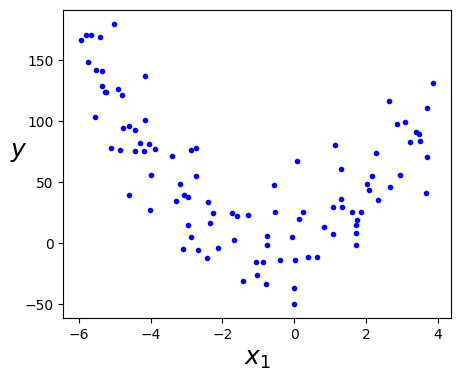

In [4]:
plt.figure(figsize=(5, 4))
plt.plot(x1, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

## train test split

In [7]:
from sklearn.model_selection import train_test_split

x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)

## Ridge Regression

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

### 使用 Ridge(): Closed-form

In [11]:
from sklearn.linear_model import Ridge

ridge_reg = Pipeline([
  ('poly', PolynomialFeatures(degree=2, include_bias=False)),
  ('scal', StandardScaler()),
  ('ridge', Ridge(alpha=m/2, random_state=42))
])

ridge_reg.fit(x1_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()),
                ('ridge', Ridge(alpha=50.0, random_state=42))])

In [12]:
ridge_reg.score(x1_train, y_train), ridge_reg.score(x1_test, y_test)

(0.5784552717061822, 0.6105451235616788)

In [13]:
ridge_reg.predict(x1_test[:5])

array([[103.41767092],
       [ 46.96666148],
       [ 31.44804399],
       [ 24.55323665],
       [ 56.08041851]])

In [ ]:
ridge_reg.score(x1_train, y_train), ridge_reg.score(x1_test, y_test)

(0.5784552717061822, 0.6105451235616788)

In [ ]:
ridge_reg.predict(x1_test[:5])

array([[103.41767092],
       [ 46.96666148],
       [ 31.44804399],
       [ 24.55323665],
       [ 56.08041851]])

### 使用 SGD Regressor(): 梯度下降

In [14]:
from sklearn.linear_model import SGDRegressor

ridge_reg = Pipeline([
  ('poly', PolynomialFeatures(degree=2, include_bias=False)),
  ('scal', StandardScaler()),
  ('ridge', SGDRegressor(penalty='l2', alpha=1, random_state=42))
])

ridge_reg.fit(x1_train, y_train)

/opt/homebrew/Caskroom/miniconda/base/envs/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()),
                ('ridge', SGDRegressor(alpha=1, random_state=42))])

In [15]:
ridge_reg.score(x1_train, y_train), ridge_reg.score(x1_test, y_test)

(0.5028060502982971, 0.5205679988985016)

In [16]:
ridge_reg.predict(x1_test[:5])


array([93.86718411, 44.04844896, 32.61644625, 27.89352445, 55.32658043])

## 繪製模型

In [26]:
def plot_model(model, x1, y):
  xls = np.linspace(x1.min(), x1.max(), 1000).reshape(-1, 1)
  y_pred = model.predict(xls)

  plt.plot(x1_train, y_train, "b.", markersize=3)
  plt.plot(x1_test, y_test, "gx", markersize=3)
  plt.plot(xls, y_pred, "r-", linewidth=2, label=r"$\hat{y}$")

  plt.xlabel("$x_1$", fontsize=18)
  plt.ylabel("$y$", rotation=0, fontsize=18)
  plt.legend(loc="upper center", fontsize=14)
  plt.axis([x1.min() - 0.5, x1.max() + 0.5, y.min() - 10, y.max() + 10])

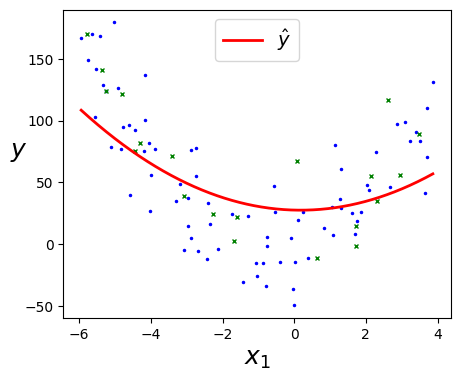

In [27]:
plt.figure(figsize=(5, 4))
plot_model(ridge_reg, x1, y)
plt.show()

## Lasso Regression

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

### 使用 Lasso()

In [29]:
from sklearn.linear_model import Lasso

lasso_reg = Pipeline([
  ('poly', PolynomialFeatures(degree=2, include_bias=False)),
  ('scal', StandardScaler()),
  ('lasso', Lasso(alpha=1, random_state=42))
])

lasso_reg.fit(x1_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()),
                ('lasso', Lasso(alpha=1, random_state=42))])

In [30]:
lasso_reg.score(x1_train, y_train), lasso_reg.score(x1_test, y_test)

(0.7473584795886363, 0.7691848793821537)

In [31]:
lasso_reg.predict(x1_test[:5])

array([130.72299081,  66.67808714,  28.92213598,   8.97607635,
        48.21708124])

### 使用 SGD Regressor(): 梯度下降

In [33]:
from sklearn.linear_model import SGDRegressor

lasso_reg = Pipeline([
  ('poly', PolynomialFeatures(degree=2, include_bias=False)),
  ('scal', StandardScaler()),
  ('lasso', SGDRegressor(penalty='l1', alpha=1, random_state=42))
])

lasso_reg.fit(x1_train, y_train.ravel())

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()),
                ('lasso',
                 SGDRegressor(alpha=1, penalty='l1', random_state=42))])

In [34]:
lasso_reg.score(x1_train, y_train), lasso_reg.score(x1_test, y_test)

(0.7471594170416986, 0.7691355046750034)

In [35]:
lasso_reg.predict(x1_test[:5])

array([130.67049049,  66.47743274,  28.86203956,   9.00696144,
        48.29946458])

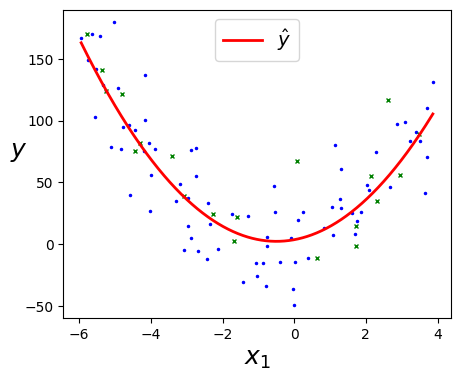

In [37]:
plt.figure(figsize=(5, 4))
plot_model(lasso_reg, x1, y)
plt.show()

## 使用 ElasticNet()

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

### 使用 Elastic Net

In [46]:

from sklearn.linear_model import ElasticNet

elastic_net = Pipeline([
  ('poly', PolynomialFeatures(degree=2, include_bias=False)),
  ('scal', StandardScaler()),
  ('elastic', ElasticNet(alpha=1, l1_ratio=0.5, random_state=42))
])

elastic_net.fit(x1_train, y_train)


Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()),
                ('elastic', ElasticNet(alpha=1, random_state=42))])

In [41]:
elastic_net.score(x1_train, y_train), elastic_net.score(x1_test, y_test)

(0.6027846519198977, 0.6361341866042756)

In [42]:
elastic_net.predict(x1_test[:5])

array([106.70178468,  47.4934376 ,  30.45996104,  22.77299145,
        55.9705529 ])

### SGD Regressor

In [48]:
from sklearn.linear_model import SGDRegressor

elastic_net = Pipeline([
  ('poly', PolynomialFeatures(degree=2, include_bias=False)),
  ('scal', StandardScaler()),
  ('elastic', SGDRegressor(penalty='elasticnet', alpha=1, l1_ratio=0.5, random_state=42))
])

elastic_net.fit(x1_train, y_train.ravel())

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()),
                ('elastic',
                 SGDRegressor(alpha=1, l1_ratio=0.5, penalty='elasticnet',
                              random_state=42))])

In [49]:
elastic_net.score(x1_train, y_train), elastic_net.score(x1_test, y_test)

(0.6024561156967987, 0.6344035011145179)

In [50]:
elastic_net.predict(x1_test[:5])

array([106.61083617,  47.09430318,  30.12804341,  22.49485134,
        55.83834478])

### 繪製

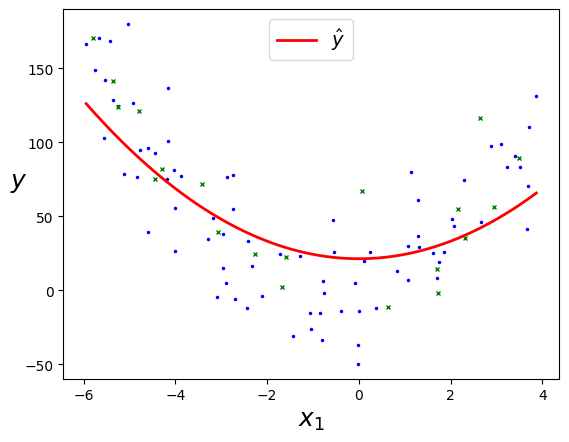

In [51]:
plt.Figure(figsize=(5, 4))
plot_model(elastic_net, x1, y)
plt.show()